# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [8]:
# TO DO: Import concrete dataset from yellowbrick library

from yellowbrick.datasets.loaders import load_concrete

concrete_data = load_concrete(return_dataset=True)

X, y = load_concrete()
print(f"Size of X: {X.shape}, Type of X: {type(X)}")
print(f"Size of y: {y.shape}, Type of y: {type(y)}")

X.head()

Size of X: (1030, 8), Type of X: <class 'pandas.core.frame.DataFrame'>
Size of y: (1030,), Type of y: <class 'pandas.core.series.Series'>


,cement,slag,ash,water,splast,coarse,fine,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [35]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 3: Instantiate the models with max_depth = 5
decision_tree = DecisionTreeRegressor(max_depth=5)
random_forest = RandomForestRegressor(max_depth=5)
gradient_boosting = GradientBoostingRegressor(max_depth=5)


decision_tree.fit(X, y)
random_forest.fit(X, y)
gradient_boosting.fit(X, y)

# Step 4/5: Calculate and print the results

results = pd.DataFrame()

models = [decision_tree, random_forest, gradient_boosting]
model_names = ["Decision Tree", "Random Forest", "Gradient Boosting"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Loop through each model and calculate training and validation accuracies
for model, model_name in zip(models, model_names):
  
    cv_results = cross_validate(model, X_test, y_test, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    
   
    mse_scores = -cv_results['test_score']
    validation_accuracy = mse_scores.mean()
    
  
    training_scores = -cv_results['train_score']
    training_accuracy = training_scores.mean()
    
    # Add the results to the DataFrame
    results.at[model_name, 'Validation accuracy'] = validation_accuracy
    results.at[model_name, 'Training accuracy'] = training_accuracy
    

# Print the results
print(results)

                   Validation accuracy  Training accuracy
Decision Tree               106.089609          32.287596
Random Forest                62.665779          21.943341
Gradient Boosting            55.352024           0.165123


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [36]:
# TO DO: ADD YOUR CODE HERE

# Step 3: Instantiate the models with max_depth = 5
decision_tree = DecisionTreeRegressor(max_depth=5)
random_forest = RandomForestRegressor(max_depth=5)
gradient_boosting = GradientBoostingRegressor(max_depth=5)


decision_tree.fit(X, y)
random_forest.fit(X, y)
gradient_boosting.fit(X, y)

results = pd.DataFrame()

models = [decision_tree, random_forest, gradient_boosting]
model_names = ["Decision Tree", "Random Forest", "Gradient Boosting"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for model, model_name in zip(models, model_names):
    # Calculate R2 score using cross_validate
    cv_results = cross_validate(model, X_test, y_test, cv=5, scoring='r2', return_train_score=True)
    
  
    r2_scores = cv_results['test_score']
    validation_accuracy = r2_scores.mean()
    
  
    training_scores = cv_results['train_score']
    training_accuracy = training_scores.mean()
    
    # Add the results to the DataFrame
    results.at[model_name, 'Validation R2 Score'] = validation_accuracy
    results.at[model_name, 'Training R2 Score'] = training_accuracy

# Print the results
print(results)

                   Validation R2 Score  Training R2 Score
Decision Tree                 0.583812           0.877019
Random Forest                 0.751915           0.917951
Gradient Boosting             0.784500           0.999367


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.

From Assignment 2 Solutions, the results were as follows from a linear model: 

       Validation accuracy	Training accuracy
MSE	     95.904136              111.358439	           
R2 score   0.623414	             0.610823

MSE:

                    Validation accuracy  Training accuracy
Decision Tree               106.089609          32.287596
Random Forest                62.665779          21.943341
Gradient Boosting            55.352024           0.165123

R2:

                      Validation R2 Score  Training R2 Score
Decision Tree                 0.583812           0.877019
Random Forest                 0.751915           0.917951
Gradient Boosting             0.784500           0.999367

We can directly compare the two results, and we can see that except from Decision Tree which performed slightly worse in the test data, Random Forest and Gradient Boosting both have better MSE and R2 scores when compared to the linear model. For example, the MSE of linear model is 95 for the test set whereas Random Forest boosts a 65, and a significant decrease to 21 for the training set. 

2. Out of the models you tested, which model would you select for this dataset and why?

I would use the Gradient Boosting model because the validation accuracy and training accuracy in terms of MSE is the lowest for the dataset. Furthermore, the R2 score is relatively the best for this model as closer to 1 the R2 score is, the better performing the model is. With a .99 R2 score for training and .78 for the test set, we can see that this model performs the best. 
3. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.
We could identify the most relevant features by analyzing feature importance scores, such as those from Random Forest or Gradient Boosting models. Focusing on the features that contribute most to predictive power would increase the accuracy of these models. 
Another thing we could do is address data quality issues by handling missing values and outliers, and impute missing data or remove outliers to ensure a cleaner dataset.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

I sourced my code using the previous assignment2 to import the concrete, and prepare the train/test datasets. I also used the help of the Binary Trees example:  https://d2l.ucalgary.ca/d2l/le/content/543310/viewContent/6097041/View
This helped me understand which errors to get in cross validation. 
1. In what order did you complete the steps?
I completed the steps as provided in the assignment, quite linearily. First, I imported the code from assignment2 to import concrete data, then instantiated the three models. I then cross validated the test set once split, and used the scoring system of MSE or R2 respectively to get the results. I appended these results to a dataframe, resulting in a completed Dataframe with validation and training accuracy. Then I created the loop of model type to get a total result for each type of model. 
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I did not use generative AI for this portion of the code. It was very similar process to the last assignment, so using it as reference I was able to calculate the two errors quite well. 
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
No challenges, What really helped me to be successful was using Assignment 2 as reference as a lot of the processes was the same for this code. I think understanding the errors helped me ot interpolate the results as well and determine if the results were looking correct or incorrect, i.e. if MSE was 1000000 it would most likely be wrong!

*DESCRIBE YOUR PROCESS HERE*

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [39]:
# TO DO: Import wine dataset  

# Define the column headers
column_headers = [
    "Class",
    "Alcohol",
    "Malic_Acid",
    "Ash",
    "Alcalinity_of_Ash",
    "Magnesium",
    "Total_Phenols",
    "Flavanoids",
    "Nonflavanoid_Phenols",
    "Proanthocyanins",
    "Color_Intensity",
    "Hue",
    "OD280_OD315_of_Diluted_Wines",
    "Proline",
]

# Load the dataset
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", names=column_headers)

# Split the dataset into feature matrix X and target vector y
X = wine_data.drop("Class", axis=1)  # Features
y = wine_data["Class"]  # Target

### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [40]:
# TO DO: ADD YOUR CODE HERE

# Print the first five rows of the dataset
print(wine_data.head())

   Class  Alcohol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_Intensity   Hue  OD280_OD315_of_Diluted_Wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [42]:
# TO DO: ADD YOUR CODE HERE

missing_values = wine_data.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:\n", missing_values)

#Since there is no missing values, no appropriate method to fill in missing values required. 


Missing Values:
 Class                           0
Alcohol                         0
Malic_Acid                      0
Ash                             0
Alcalinity_of_Ash               0
Magnesium                       0
Total_Phenols                   0
Flavanoids                      0
Nonflavanoid_Phenols            0
Proanthocyanins                 0
Color_Intensity                 0
Hue                             0
OD280_OD315_of_Diluted_Wines    0
Proline                         0
dtype: int64


How many samples do we have of each type of wine?

In [43]:
# TO DO: ADD YOUR CODE HERE

# Count the number of samples for each type of wine
wine_counts = wine_data["Class"].value_counts()

# Print the counts
print("Number of Samples for Each Type of Wine:")
print(wine_counts)

Number of Samples for Each Type of Wine:
2    71
1    59
3    48
Name: Class, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [72]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

#Step 3

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

svc_model = SVC()
dt_model = DecisionTreeClassifier(max_depth=3)
svc_model.fit(X, y)
dt_model.fit(X, y)   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 4/5
results = pd.DataFrame(columns=['Method', 'Data Size', 'Training Accuracy', 'Validation Accuracy'])

data_sizes = []
training_accuracies = []
validation_accuracies = []
methods = []

# Calculate the data size, training accuracy, and validation accuracy for each model
for model, model_name in [(svc_model, 'SVC'), (dt_model, 'Decision Tree')]:
    scores = cross_validate(model, X_test, y_test, cv=5, scoring='accuracy', return_train_score=True)
    
 
    data_size = X.shape[0]
    
 
    train_accuracy = scores['train_score'].mean()
    validation_accuracy = scores['test_score'].mean()
    
  
    data_sizes.append(data_size)
    training_accuracies.append(train_accuracy)
    validation_accuracies.append(validation_accuracy)
    methods.append(model_name)

# Add the data to the DataFrame
results['Method'] = methods
results['Data Size'] = data_sizes
results['Training Accuracy'] = training_accuracies
results['Validation Accuracy'] = validation_accuracies

# Print the results
print(results)


          Method  Data Size  Training Accuracy  Validation Accuracy
0            SVC        178           0.805419             0.803571
1  Decision Tree        178           1.000000             0.832143


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [73]:
# TO DO: Implement best model

highest_accuracy_method = results.loc[results['Validation Accuracy'].idxmax()]['Method']

print(highest_accuracy_method)
dt_model.fit(X_train, y_train)

Decision Tree


DecisionTreeClassifier(max_depth=3)

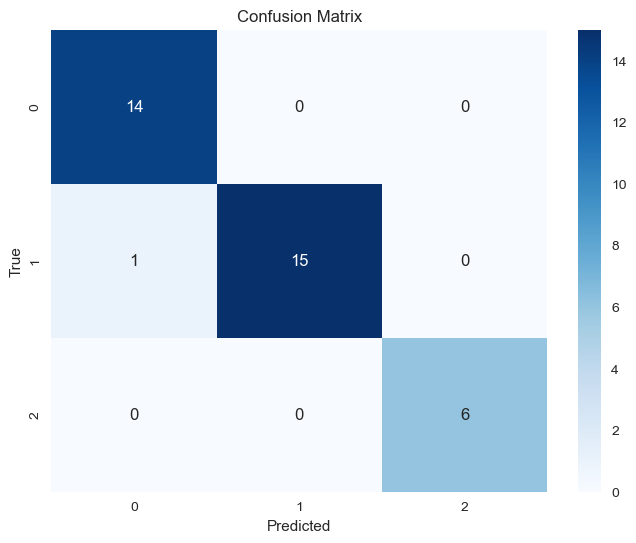

In [74]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = dt_model.predict(X_test)
    
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
    
# Print confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [75]:
# TO DO: Print classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.

           Method  Data Size  Training Accuracy  Validation Accuracy
0            SVC        178           0.805419             0.803571
1  Decision Tree        178           1.000000             0.832143

From the results of training and validation accuracy, we can see that using SVC resulted in a worse training accuracy as well as validation accuracy (.805 vs 1)! The validation accuracy is .032 greater as well, showing us that Decision Tree is a better model for this dataset. 

1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
SVMs don’t scale very well with the number of samples, so running this data with 14x178 may have caused issues. Another downside of SVMs is that they require careful preprocessing of the data and tuning of the parameters, and because we didn't really do this for this dataset, it may have cause more errors. As a result, SVM's are more sensitive to noisy or outlier data points causing inaccuracies. Lastly, SVMs are designed to find linear decision boundaries in the feature space. SVMs may struggle to capture a non-linearity relationship effectively as a result, whereas Decision trees are more suitable for non-linear relationships in the data.


2. How many samples were incorrectly classified in step 5.2? 
In order to determine incorrectly classified samples, we used the accuracy score in the classification report 0.97.

Number of Incorrectly Classified Samples = Total Samples - (Accuracy * Total Samples)

Total Samples: 36 (as indicated in the "support" of the classification report)
Accuracy: 0.97 (as the overall accuracy from the report)
Number of Incorrectly Classified Samples = 36 - (0.97 * 36) =  0.48

Rounding up to a whole number, we can deduce that the number of incorrectly classified samples was 1. 

3. In this case, is maximizing precision or recall more important? Why?

Precision measures the accuracy of positive predictions. In this context, high precision means that when the model predicts a class, it is very likely to be correct. Recall measures the ability of the model to capture all positive instances. High recall means that the model is effective at identifying most of the positive instances. With two perfect precision scores for class 2 and 3, and 0.93 for class 1, it is all very high, however since relatively 0.93 is lower than 0.94 it may be better to maximize precision. However, since these results are very close, there is really an argument for both sides.  


*YOUR ANSWERS HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

I sourced my code using the first part of this assignment and more analysis to the data given. For example, the column headers was provided in the wine.names file. Using the previous code in this assignment, I followed similar code however had to modify a few things, but overall was pretty fun. 
1. In what order did you complete the steps?
I completed the steps as shown above, following the exact steps guided by the assignment. 
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I did use generative AI to determine the formula to calculate the incorrectly classified samples in step 5.2, as I was not sure how to do this. 
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

I think the biggest challenge for me at this part was trying to make the classification matrix and classification report as I had to look to see how to do this. It wasn't readily available in the examples or labs so I had to do some digging. 

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

The classification report shows that the model performs very well in classifying multiple classes. It achieves high precision and recall for most classes, reflecting its ability to make accurate predictions without sacrificing the ability to capture positive instances. The F1-scores are high, indicating a good balance between precision and recall. The overall accuracy is also impressive at 97%. These results align with the lecture discussions on the importance of precision, recall, balance, and evaluating model performance in multi-class classification.

*ADD YOUR FINDINGS HERE*

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I overall enjoyed working on this assignment, and it made me realize that although there are different models we can code such as Decision Trees or SVM's, the process is almost identicial to linear regression. Theres like a step formula you can follow to instantiate these machine learning models and most of the time, it is very similar. The difficult part is interpolating or understanding the results and trying to improve the model in my opinion. 

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [70]:
# TO DO: ADD YOUR CODE HERE

from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

svc_model = SVC()
linear_svc_model = LinearSVC(max_iter=5000)
dt_model = DecisionTreeClassifier(max_depth=3)


models = [svc_model, linear_svc_model]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


results = pd.DataFrame(columns=['Method', 'Data Size', 'Training Accuracy', 'Validation Accuracy'])

# Initialize lists to store the data
data_sizes = []
training_accuracies = []
validation_accuracies = []
methods = []

# Calculate the data size, training accuracy, and validation accuracy for each model
for model in models:
    model_name = model.__class__.__name__  # Get the model name
    scores = cross_validate(model, X_test, y_test, cv=5, scoring='accuracy', return_train_score=True)
    

    data_size = X.shape[0]
    

    train_accuracy = scores['train_score'].mean()
    validation_accuracy = scores['test_score'].mean()
    
    # Append the results to the lists
    data_sizes.append(data_size)
    training_accuracies.append(train_accuracy)
    validation_accuracies.append(validation_accuracy)
    methods.append(model_name)

# Add the data to the DataFrame
results['Method'] = methods
results['Data Size'] = data_sizes
results['Training Accuracy'] = training_accuracies
results['Validation Accuracy'] = validation_accuracies

# Print the results
print(results)

      Method  Data Size  Training Accuracy  Validation Accuracy
0        SVC        178           0.805419             0.803571
1  LinearSVC        178           0.930788             0.885714


C:\Users\ericy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\ericy\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ericy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\ericy\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ericy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` expl

*ANSWER HERE*

With a better accuracy for the training and test sets, LinearSVC improves the results when compared to SVC. (0.803 vs 0.885) When compared to decision trees, the test accuracy is actually greater (0.88 vs 0.86) so there may be a point in using this as the most optimal model! However, since training accuracy is not 1, it is not as great compared to decision trees. 